In [425]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [511]:
final1 = pd.read_csv("final11.csv")

In [514]:
stats = pd.read_csv("fighter_stats.csv")

In [515]:
updated_record = pd.read_csv("updated_record.csv")

In [516]:
updated_record.drop(["Unnamed: 0", "First", "Last"], axis=1, inplace=True)

In [517]:
updated_record[updated_record["Name"] == "Bruno Silva"]

,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt,Name
3657,Bulldog,"5' 4""",125 lbs.,"65.0""",Orthodox,14,7,2,NaN,Bruno Silva
3658,Blindado,"6' 0""",185 lbs.,"74.0""",Orthodox,23,13,0,NaN,Bruno Silva


In [518]:
stats.iloc[[3633, 3634, 3618, 3645, 1385, 1387, 2469, 2467,869, 864, 1840, 1848]] #These are all the fighters that share first and last names.

,Unnamed: 0,Ht.,Wt.,Reach,Stance,W,L,D,Name,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:
3633,3633,"5' 4""",125 lbs.,"65.0""",Orthodox,14,7,2,Bruno Silva,3.86,48%,5.35,41%,0.77,22%,74%,0.0
3634,3634,"6' 0""",185 lbs.,"74.0""",Orthodox,23,13,0,Bruno Silva,3.83,49%,4.81,50%,1.79,23%,60%,0.2
3618,3618,"5' 6""",160 lbs.,--,Orthodox,19,12,3,Jean Silva,4.87,52%,4.13,56%,0.60,50%,86%,0.9
3645,3645,"5' 7""",145 lbs.,"69.0""",Orthodox,16,2,0,Jean Silva,0.73,22%,2.93,52%,0.00,0%,0%,0.0
1385,1385,"5' 10""",135 lbs.,"73.0""",Orthodox,6,2,0,Joey Gomez,3.73,49%,3.33,50%,2.00,28%,0%,0.0
1387,1387,"5' 10""",155 lbs.,"71.0""",Orthodox,7,1,0,Joey Gomez,2.44,28%,4.46,55%,0.62,100%,50%,0.0
2469,2469,"5' 9""",135 lbs.,"70.0""",Orthodox,17,4,0,Michael McDonald,0.00,0%,0.40,50%,0.00,0%,0%,0.0
2467,2467,"5' 11""",205 lbs.,--,Orthodox,1,1,0,Michael McDonald,2.69,42%,2.76,57%,1.09,66%,52%,1.4
869,869,"6' 0""",155 lbs.,"72.0""",Orthodox,12,3,0,Mike Davis,0.00,0%,0.00,0%,0.00,0%,0%,0.0
864,864,--,--,--,NaN,2,0,0,Mike Davis,4.73,53%,5.23,54%,2.40,44%,60%,0.8


In [519]:
# stats[stats["Name"] == "Tony Johnson"]
stats.drop([3633, 3634, 3618, 3645, 1385, 1387, 2469, 2467,869, 864, 1840, 1848], inplace=True)

In [520]:
final_stats = pd.merge(left= stats[[x for x in stats.columns if x not in ["Unnamed: 0", "Ht.", "Reach", "Stance", "W", "L", "D"]]], right = updated_record, on=["Name", "Wt."], how="right")

In [521]:
final_stats[final_stats["Name"] == "Bruno Silva"]

,Wt.,Name,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:,Nickname,Ht.,Reach,Stance,W,L,D,Belt
3657,125 lbs.,Bruno Silva,3.83,49%,4.81,50%,1.79,23%,60%,0.2,Bulldog,"5' 4""","65.0""",Orthodox,14,7,2,NaN
3658,185 lbs.,Bruno Silva,3.86,48%,5.35,41%,0.77,22%,74%,0.0,Blindado,"6' 0""","74.0""",Orthodox,23,13,0,NaN


In [522]:
stats1 = final_stats[[x for x in final_stats.columns if x not in ["D", "W", "L"]]]

In [523]:
stats1

,Wt.,Name,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:,Nickname,Ht.,Reach,Stance,Belt
0,155 lbs.,Tom Aaron,0.00,0%,0.00,0%,0.00,0%,0%,0.0,NaN,--,--,NaN,NaN
1,155 lbs.,Danny Abbadi,3.29,38%,4.41,57%,0.00,0%,77%,0.0,The Assassin,"5' 11""",--,Orthodox,NaN
2,155 lbs.,Nariman Abbasov,3.00,20%,5.67,46%,0.00,0%,66%,0.0,Bayraktar,"5' 8""","66.0""",Orthodox,NaN
3,265 lbs.,David Abbott,1.35,30%,3.55,38%,1.07,33%,66%,0.0,Tank,"6' 0""",--,Switch,NaN
4,264 lbs.,Hamdy Abdelwahab,3.49,49%,4.49,51%,1.33,66%,100%,0.0,The Hammer,"6' 2""","72.0""",Southpaw,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,170 lbs.,Dave Zitanick,0.00,0%,0.00,0%,0.00,0%,0%,0.0,NaN,--,--,NaN,NaN
4395,145 lbs.,Alex Zuniga,0.00,0%,0.00,0%,0.00,0%,0%,0.0,NaN,--,--,NaN,NaN
4396,185 lbs.,George Zuniga,7.64,38%,5.45,37%,0.00,0%,100%,0.0,NaN,"5' 9""",--,NaN,NaN
4397,155 lbs.,Allan Zuniga,3.93,52%,1.80,61%,0.00,0%,57%,1.0,Tigre,"5' 7""","70.0""",Orthodox,NaN


In [524]:
weight_classes = ['115 lbs.', '125 lbs.', '135 lbs.', '145 lbs.', '155 lbs.', '170 lbs.', '185 lbs.', '205 lbs.', '265 lbs.']


In [525]:
final1.sort_values("Date", ascending=False, inplace=True)
final1.columns
final1.drop(["Method_y", "Is_Winner_y"], axis=1, inplace=True)
final1.rename(columns={"Method_x": "Method"}, inplace=True)

In [526]:
final1["Weight_class"].unique()

array(['Middleweight', 'Welterweight', 'Bantamweight', 'Featherweight',
       'Heavyweight', 'Light Heavyweight', 'Flyweight',
       "Women's Strawweight", "Women's Flyweight", 'Lightweight',
       'Catch Weight', "Women's Bantamweight", "Women's Featherweight",
       'Super Heavyweight', 'Open Weight'], dtype=object)

In [527]:
final1

,Unnamed: 0,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Lost_Last_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Last_Fight_Date,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Lost_Last_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opp_Current_Win_Streak
16549,16549,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,False,0.666667,17,True,6,Middleweight,DEC,5,1.0,66.0,0.0,True,2025-05-03,84 days,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,False,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.00,0.5,0.000000,0.166667,0.000000,0.333333,0.00,0,3
16537,16537,6,2025-07-26,Muslim Salikhov,Carlos Leal,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,Welterweight,KO,1,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,4.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12,2,0.500000,1.000000,0.000000,0.000000,0.500000,0.00,0.5,0.000000,0.250000,0.000000,0.250000,1.00,2,1
16526,16526,5,2025-07-26,Said Nurmagomedov,Bryce Mitchell,0.0,13.0,0.0,False,2025-02-01,175 days,0.0,43.0,1.0,0.000000,27.333333,0.666667,False,False,0.333333,7,True,3,Bantamweight,DEC,3,1.0,20.0,1.0,True,2025-04-12,105 days,1.0,27.0,3.0,0.666667,11.666667,1.333333,False,False,0.333333,8,True,3,2.0,3.0,2.0,0.0,0.0,3.0,1.0,1.0,6.0,1.0,2.0,0.0,10,11,0.285714,0.125000,0.428571,0.125000,0.285714,0.75,0.0,0.333333,0.000000,0.666667,1.000000,0.00,0,0
16527,16527,6,2025-07-26,Carlos Leal,Muslim Salikhov,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,Welterweight,KO,1,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0,1.0,1.0,2,12,1.000000,0.500000,0.000000,0.000000,0.000000,0.50,0.0,0.500000,0.000000,0.250000,1.000000,0.25,1,2
16528,16528,1,2025-07-26,Petr Yan,Marcus McGhee,0.0,64.0,0.0,True,2024-11-23,245 days,0.0,53.0,0.0,0.000000,95.333333,0.000000,False,True,0.666667,10,False,4,Bantamweight,DEC,3,0.0,81.0,0.0,False,2024-11-16,252 days,0.0,48.0,0.0,0.000000,26.666667,0.000000,False,True,1.000000,4,False,0,4.0,0.0,6.0,0.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,14,4,0.400000,0.500000,0.000000,0.250000,0.600000,0.25,0.0,0.000000,0.000000,0.000000,0.750000,0.00,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,26,8267,1994-03-11,Patrick Smith,Scott Morris,0.0,0.0,0.0,True,1994-03-11,0 days,0.0,4.0,0.0,0.000000,3.000000,0.000000,False,True,0.666667,1,False,0,Open Weight,SUB,1,0.0,1.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,N

In [528]:
ufc_weight_classes = {
    "Women's Strawweight": "115 lbs.",
    "Women's Flyweight": "125 lbs.",
    "Women's Bantamweight": "135 lbs.",
    "Women's Featherweight": "145 lbs.",
    "Flyweight": "125 lbs.",
    "Bantamweight": "135 lbs.",
    "Featherweight": "145 lbs.",
    "Lightweight": "155 lbs.",
    "Welterweight": "170 lbs.",
    "Middleweight": "185 lbs.",
    "Light Heavyweight": "205 lbs.",
    "Heavyweight": "265 lbs."
}


In [529]:
final2 = final1[final1["Weight_class"].isin(ufc_weight_classes)]

In [530]:
final2 = pd.merge(left = final2, right = final_stats[["Name", "Nickname"]], left_on = "Fighter", right_on = "Name")
final2

,Unnamed: 0,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Lost_Last_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Last_Fight_Date,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Lost_Last_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opp_Current_Win_Streak,Name,Nickname
0,16549,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,False,0.666667,17,True,6,Middleweight,DEC,5,1.0,66.0,0.0,True,2025-05-03,84 days,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,False,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.00,0.5,0.000000,0.166667,0.000000,0.333333,0.00,0,3,Robert Whittaker,The Reaper
1,16537,6,2025-07-26,Muslim Salikhov,Carlos Leal,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,Welterweight,KO,1,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,4.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12,2,0.500000,1.000000,0.000000,0.000000,0.500000,0.00,0.5,0.000000,0.250000,0.000000,0.250000,1.00,2,1,Muslim Salikhov,King of Kung Fu
2,16526,5,2025-07-26,Said Nurmagomedov,Bryce Mitchell,0.0,13.0,0.0,False,2025-02-01,175 days,0.0,43.0,1.0,0.000000,27.333333,0.666667,False,False,0.333333,7,True,3,Bantamweight,DEC,3,1.0,20.0,1.0,True,2025-04-12,105 days,1.0,27.0,3.0,0.666667,11.666667,1.333333,False,False,0.333333,8,True,3,2.0,3.0,2.0,0.0,0.0,3.0,1.0,1.0,6.0,1.0,2.0,0.0,10,11,0.285714,0.125000,0.428571,0.125000,0.285714,0.75,0.0,0.333333,0.000000,0.666667,1.000000,0.00,0,0,Said Nurmagomedov,NaN
3,16527,6,2025-07-26,Carlos Leal,Muslim Salikhov,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,Welterweight,KO,1,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0,1.0,1.0,2,12,1.000000,0.500000,0.000000,0.000000,0.000000,0.50,0.0,0.500000,0.000000,0.250000,1.000000,0.25,1,2,Carlos Leal,The Lion
4,16528,1,2025-07-26,Petr Yan,Marcus McGhee,0.0,64.0,0.0,True,2024-11-23,245 days,0.0,53.0,0.0,0.000000,95.333333,0.000000,False,True,0.666667,10,False,4,Bantamweight,DEC,3,0.0,81.0,0.0,False,2024-11-16,252 days,0.0,48.0,0.0,0.000000,26.666667,0.000000,False,True,1.000000,4,False,0,4.0,0.0,6.0,0.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,14,4,0.400000,0.500000,0.000000,0.250000,0.600000,0.25,0.0,0.000000,0.000000,0.000000,0.750000,0.00,2,4,Petr Yan,No Mercy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16165,241,8155,1997-02-07,Nick Sanzo,Jerry Bohlander,0.0,2.0,1.0,False,1997-02-07,0 days,N

In [531]:
final2 = pd.merge(left=final2, right= final_stats[["Name", "Nickname"]], left_on = "Opponent", right_on = "Name")
final2

,Unnamed: 0,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Lost_Last_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Last_Fight_Date,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Lost_Last_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opp_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y
0,16549,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,False,0.666667,17,True,6,Middleweight,DEC,5,1.0,66.0,0.0,True,2025-05-03,84 days,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,False,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.00,0.5,0.000000,0.166667,0.000000,0.333333,0.00,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR
1,16537,6,2025-07-26,Muslim Salikhov,Carlos Leal,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,Welterweight,KO,1,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,4.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12,2,0.500000,1.000000,0.000000,0.000000,0.500000,0.00,0.5,0.000000,0.250000,0.000000,0.250000,1.00,2,1,Muslim Salikhov,King of Kung Fu,Carlos Leal,The Lion
2,16526,5,2025-07-26,Said Nurmagomedov,Bryce Mitchell,0.0,13.0,0.0,False,2025-02-01,175 days,0.0,43.0,1.0,0.000000,27.333333,0.666667,False,False,0.333333,7,True,3,Bantamweight,DEC,3,1.0,20.0,1.0,True,2025-04-12,105 days,1.0,27.0,3.0,0.666667,11.666667,1.333333,False,False,0.333333,8,True,3,2.0,3.0,2.0,0.0,0.0,3.0,1.0,1.0,6.0,1.0,2.0,0.0,10,11,0.285714,0.125000,0.428571,0.125000,0.285714,0.75,0.0,0.333333,0.000000,0.666667,1.000000,0.00,0,0,Said Nurmagomedov,NaN,Bryce Mitchell,Thug Nasty
3,16527,6,2025-07-26,Carlos Leal,Muslim Salikhov,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,Welterweight,KO,1,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0,1.0,1.0,2,12,1.000000,0.500000,0.000000,0.000000,0.000000,0.50,0.0,0.500000,0.000000,0.250000,1.000000,0.25,1,2,Carlos Leal,The Lion,Muslim Salikhov,King of Kung Fu
4,16528,1,2025-07-26,Petr Yan,Marcus McGhee,0.0,64.0,0.0,True,2024-11-23,245 days,0.0,53.0,0.0,0.000000,95.333333,0.000000,False,True,0.666667,10,False,4,Bantamweight,DEC,3,0.0,81.0,0.0,False,2024-11-16,252 days,0.0,48.0,0.0,0.000000,26.666667,0.000000,False,True,1.000000,4,False,0,4.0,0.0,6.0,0.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,14,4,0.400000,0.500000,0.000000,0.250000,0.600000,0.25,0.0,0.000000,0.000000,0.000000,0.750000,0.00,2,4,Petr Yan,No Mercy,Marcus McGhee,The Maniac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [532]:
final2["Weight_class_lbs"] = final2["Weight_class"].map(ufc_weight_classes)

In [533]:

final2 = final2[~((final2["Name_x"] == "Bruno Silva") & (final2["Weight_class_lbs"] == "185 lbs.") & (final2["Nickname_x"] != "Blindado"))]
final2 = final2[~((final2["Name_y"] == "Bruno Silva") & (final2["Weight_class_lbs"] == "185 lbs.") & (final2["Nickname_y"] != "Blindado"))]

final2 = final2[~((final2["Name_x"] == "Bruno Silva") & ((final2["Weight_class_lbs"] == "125 lbs.") | (final2["Weight_class_lbs"] == "135 lbs."))& (final2["Nickname_x"] != "Bulldog"))]
final2 = final2[~((final2["Name_y"] == "Bruno Silva") & ((final2["Weight_class_lbs"] == "125 lbs.") | (final2["Weight_class_lbs"] == "135 lbs."))& (final2["Nickname_y"] != "Bulldog"))]




final2[final2["Opponent"] == "Bruno Silva"]

,Unnamed: 0,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Lost_Last_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Last_Fight_Date,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Lost_Last_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opp_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs
234,12051,2252,2021-03-20,JP Buys,Bruno Silva,3.0,37.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0,False,0,Flyweight,KO,2,0.0,17.0,1.0,True,2020-10-10,161 days,0.0,46.0,0.0,0.333333,50.333333,0.333333,False,False,0.000000,0,True,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0,0,JP Buys,Young Savage,Bruno Silva,Bulldog,125 lbs.
235,12240,2161,2021-05-22,Victor Rodriguez,Bruno Silva,1.0,6.0,0.0,False,2020-10-31,203 days,1.0,17.0,0.0,NaN,NaN,NaN,False,False,NaN,0,True,1,Flyweight,KO,1,0.0,0.0,0.0,True,2021-03-20,63 days,0.0,17.0,1.0,0.000000,43.333333,0.333333,False,True,0.333333,1,False,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1,4,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0,1,Victor Rodriguez,Vicious,Bruno Silva,Bulldog,125 lbs.
1028,11600,2476,2020-10-10,Tagir Ulanbekov,Bruno Silva,0.0,47.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0,False,0,Flyweight,DEC,3,0.0,46.0,0.0,False,2020-03-14,210 days,0.0,67.0,0.0,NaN,NaN,NaN,False,False,NaN,0,True,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0,0,Tagir Ulanbekov,NaN,Bruno Silva,Bulldog,125 lbs.
1681,13528,1514,2022-08-13,Gerald Meerschaert,Bruno Silva,0.0,29.0,0.0,True,2022-04-30,105 days,0.0,65.0,0.0,0.000000,39.000000,0.333333,False,False,0.666667,9,True,7,Middleweight,SUB,3,1.0,46.0,1.0,False,2022-03-12,154 days,0.0,108.0,0.0,0.000000,53.666667,0.000000,False,False,0.666667,5,True,4,1.0,8.0,0.0,3.0,1.0,3.0,5.0,0.0,0.0,0.0,0.0,3.0,16,9,0.111111,1.000000,0.888889,0.000000,0.000000,0.0,0.428571,0.000000,0.142857,0.000000,0.428571,0.750000,0,0,Gerald Meerschaert,GM3,Bruno Silva,Blindado,185 lbs.
1682,16334,116,2025-05-10,Marc-Andre Barriault,Bruno Silva,0.0,6.0,0.0,True,2024-11-02,189 days,1.0,13.0,1.0,0.666667,53.666667,0.333333,False,False,0.000000,6,True,8,Middleweight,KO,1,1.0,14.0,0.0,False,2024-12-14,147 days,1.0,111.0,0.0,0.333333,68.333333,1.000000,False,False,0.333333,8,True,10,2.0,1.0,2.0,3.0,1.0,4.0,7.0,1.0,0.0,1.0,2.0,6.0,14,18,0.333333,0.875000,0.166667,0.125000,0.333333,0.0,0.375000,0.100000,0.125000,0.200000,0.500000,0.600000,0,0,Marc-Andre Barriault,Powerbar,Bruno Silva,Blindado,185 lbs.
1770,15923,304,2024-12-14,Manel Kape,Bruno Silva,0.0,57.0,0.0,True,2024-07-27,140 days,0.0,30.0,0.0,0.000000,54.000000,0.000000,False,False,0.666667,4,True,3,Flyweight,KO,3,1.0,111.0,0.0,False,2024-10-26,49 days,0.0,66.0,

In [534]:
len(final2)

16130

In [535]:
#Jean Silva
final2 = final2[~((final2["Nickname_x"] == "White Bear") | (final2["Nickname_y"] == "White Bear"))]

In [536]:
# #Joey Gomez

final2 = final2[~(((final2["Nickname_x"].isna()) & (final2["Name_x"] == "Joey Gomez")) |((final2["Nickname_y"].isna()) & (final2["Name_y"] == "Joey Gomez")))]


In [537]:
#Mike Davis
final2 = final2[~(((final2["Nickname_x"].isna()) & (final2["Name_x"] == "Mike Davis")) |((final2["Nickname_y"].isna()) & (final2["Name_y"] == "Mike Davis")))]

In [538]:
#Michael McDonald
final2 = final2[~(((final2["Nickname_x"] == "The Black Sniper") & (final2["Name_x"] == "Michael McDonald")) |((final2["Nickname_y"] == "The Black Sniper") & (final2["Name_y"] == "Michael McDonald")))]

In [539]:
stats1

,Wt.,Name,SLpM:,Str. Acc.:,SApM:,Str. Def:,TD Avg.:,TD Acc.:,TD Def.:,Sub. Avg.:,Nickname,Ht.,Reach,Stance,Belt
0,155 lbs.,Tom Aaron,0.00,0%,0.00,0%,0.00,0%,0%,0.0,NaN,--,--,NaN,NaN
1,155 lbs.,Danny Abbadi,3.29,38%,4.41,57%,0.00,0%,77%,0.0,The Assassin,"5' 11""",--,Orthodox,NaN
2,155 lbs.,Nariman Abbasov,3.00,20%,5.67,46%,0.00,0%,66%,0.0,Bayraktar,"5' 8""","66.0""",Orthodox,NaN
3,265 lbs.,David Abbott,1.35,30%,3.55,38%,1.07,33%,66%,0.0,Tank,"6' 0""",--,Switch,NaN
4,264 lbs.,Hamdy Abdelwahab,3.49,49%,4.49,51%,1.33,66%,100%,0.0,The Hammer,"6' 2""","72.0""",Southpaw,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4394,170 lbs.,Dave Zitanick,0.00,0%,0.00,0%,0.00,0%,0%,0.0,NaN,--,--,NaN,NaN
4395,145 lbs.,Alex Zuniga,0.00,0%,0.00,0%,0.00,0%,0%,0.0,NaN,--,--,NaN,NaN
4396,185 lbs.,George Zuniga,7.64,38%,5.45,37%,0.00,0%,100%,0.0,NaN,"5' 9""",--,NaN,NaN
4397,155 lbs.,Allan Zuniga,3.93,52%,1.80,61%,0.00,0%,57%,1.0,Tigre,"5' 7""","70.0""",Orthodox,NaN


In [540]:
fighter_merge = pd.merge(left=final2, right = stats1, left_on = ["Fighter", "Nickname_x"], right_on = ["Name", "Nickname"], how="left")

In [541]:
fighter_merge.drop(["Nickname", "Wt.", "Name"], axis=1, inplace=True)

In [542]:
fighter_merge2 =  pd.merge(left=fighter_merge, right = stats1, left_on = ["Opponent", "Nickname_y"], right_on = ["Name", "Nickname"], how="left")

In [543]:
fighter_merge2.drop(["Name", "Nickname","Belt_x", "Wt.", "Belt_y"], axis=1, inplace=True)

In [544]:
fighter_merge2

,Unnamed: 0,index,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Last_Fight_Date,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Lost_Last_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Last_Fight_Date,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Lost_Last_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opp_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,Stance_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Stance_y
0,16549,0,2025-07-26,Robert Whittaker,Reinier de Ridder,0.0,67.0,0.0,False,2024-10-26,273 days,0.0,3.0,1.0,0.000000,25.000000,0.333333,False,False,0.666667,17,True,6,Middleweight,DEC,5,1.0,66.0,0.0,True,2025-05-03,84 days,0.0,8.0,0.0,0.000000,16.333333,0.000000,False,True,1.000000,3,False,0,6.0,0.0,11.0,3.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,23,3,0.352941,0.333333,0.000000,0.666667,0.647059,0.00,0.5,0.000000,0.166667,0.000000,0.333333,0.00,0,3,Robert Whittaker,The Reaper,Reinier de Ridder,RdR,185 lbs.,4.54,43%,3.41,59%,0.80,38%,81%,0.0,"6' 0""","73.0""",Orthodox,3.25,60%,2.21,44%,4.74,38%,66%,1.4,"6' 4""","78.0""",Southpaw
1,16537,6,2025-07-26,Muslim Salikhov,Carlos Leal,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,Welterweight,KO,1,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,4.0,0.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,12,2,0.500000,1.000000,0.000000,0.000000,0.500000,0.00,0.5,0.000000,0.250000,0.000000,0.250000,1.00,2,1,Muslim Salikhov,King of Kung Fu,Carlos Leal,The Lion,170 lbs.,3.38,49%,2.90,62%,1.08,32%,72%,0.0,"5' 11""","70.0""",Orthodox,9.65,50%,7.73,53%,0.78,25%,90%,0.0,"5' 11""","74.0""",Orthodox
2,16526,5,2025-07-26,Said Nurmagomedov,Bryce Mitchell,0.0,13.0,0.0,False,2025-02-01,175 days,0.0,43.0,1.0,0.000000,27.333333,0.666667,False,False,0.333333,7,True,3,Bantamweight,DEC,3,1.0,20.0,1.0,True,2025-04-12,105 days,1.0,27.0,3.0,0.666667,11.666667,1.333333,False,False,0.333333,8,True,3,2.0,3.0,2.0,0.0,0.0,3.0,1.0,1.0,6.0,1.0,2.0,0.0,10,11,0.285714,0.125000,0.428571,0.125000,0.285714,0.75,0.0,0.333333,0.000000,0.666667,1.000000,0.00,0,0,Said Nurmagomedov,NaN,Bryce Mitchell,Thug Nasty,135 lbs.,3.38,47%,2.25,56%,1.01,15%,62%,1.2,"5' 8""","70.0""",Orthodox,2.44,59%,1.64,60%,3.27,36%,33%,1.3,"5' 10""","70.0""",Southpaw
3,16527,6,2025-07-26,Carlos Leal,Muslim Salikhov,1.0,3.0,0.0,False,2025-03-08,140 days,0.0,40.0,0.0,NaN,NaN,NaN,False,True,NaN,1,False,1,Welterweight,KO,1,0.0,5.0,0.0,True,2024-11-23,245 days,0.0,9.0,0.0,0.333333,21.000000,0.000000,False,True,0.666667,8,False,4,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0,2.0,1.0,1.0,2,12,1.000000,0.500000,0.000000,0.000000,0.000000,0.50,0.0,0.500000,0.000000,0.250000,1.000000,0.25,1,2,Carlos Leal,The Lion,Muslim Salikhov,King of Kung Fu,170 lbs.,9.65,50%,7.73,53%,0.78,25%,90%,0.0,"5' 11""","74.0""",Orthodox,3.38,49%,

In [545]:
# fighter_merge2.drop(["Belt_x", "Belt_y", "_merge", "Wt._x", ], axis=1, inplace=True)

In [546]:
fighter_merge2["Closed_Stance"] = fighter_merge2["Stance_x"] == fighter_merge2["Stance_y"]

In [547]:
cleaned_final = fighter_merge2.drop(["Stance_x", "Stance_y", "Unnamed: 0", "index", "Last_Fight_Date", "Lost_Last_Fight", "Opp_Last_Fight_Date", "Opp_Lost_Last_Fight"], axis=1)

In [549]:
cleaned_final[cleaned_final["Fighter"] == "Kevin Randleman"].sort_values("Date", ascending=True)

,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opp_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance
15927,1999-03-05,Kevin Randleman,Maurice Smith,0.0,9.0,2.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0,0,Heavyweight,DEC,2,0.0,17.0,0.0,False,439 days,0.0,19.0,1.0,0.333333,14.333333,1.000000,False,False,0.666667,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,3,0.0,0.000000,0.0,0.500000,0.0,0.500000,0.000000,0.0,0.0,0.0,0.000000,1.0,0,0,Kevin Randleman,The Monster,Maurice Smith,NaN,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,0.41,46%,0.47,60%,0.89,50%,20%,0.9,"6' 2""",--,True
15910,1999-05-07,Kevin Randleman,Bas Rutten,0.0,18.0,1.0,False,63 days,0.0,9.0,2.0,NaN,NaN,NaN,False,True,NaN,1,0,Heavyweight,DEC,3,0.0,20.0,0.0,True,119 days,0.0,23.0,0.0,NaN,NaN,NaN,False,True,NaN,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,1.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1,1,Kevin Randleman,The Monster,Bas Rutten,El Guapo,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,5.59,61%,2.06,79%,0.00,0%,0%,0.0,"6' 1""",--,True
15868,1999-11-19,Kevin Randleman,Pete Williams,1.0,8.0,1.0,True,196 days,0.0,18.0,1.0,NaN,NaN,NaN,False,False,NaN,1,1,Heavyweight,DEC,5,0.0,10.0,2.0,False,196 days,0.0,6.0,0.0,0.000000,7.333333,1.666667,False,True,0.666667,3,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2,4,0.0,0.333333,0.0,0.666667,1.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.0,0,2,Kevin Randleman,The Monster,Pete Williams,El Duro,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,0.61,62%,2.77,40%,1.84,40%,16%,0.9,"6' 3""",--,True
15829,2000-06-09,Kevin Randleman,Pedro Rizzo,0.0,12.0,0.0,True,203 days,1.0,8.0,1.0,0.333333,11.666667,1.333333,False,True,0.666667,2,1,Heavyweight,DEC,5,0.0,17.0,2.0,False,203 days,0.0,14.0,0.0,0.000000,18.333333,0.000000,False,True,1.000000,4,0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,3,4,0.0,0.750000,0.0,0.000000,1.0,0.250000,0.000000,0.0,0.0,0.0,1.000000,0.0,1,4,Kevin Randleman,The Monster,Pedro Rizzo,The Rock,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,1.93,34%,3.02,50%,0.26,28%,78%,0.0,"6' 1""",--,True
15803,2000-11-17,Kevin Randleman,Randy Couture,0.0,28.0,1.0,False,161 days,0.0,12.0,0.0,0.333333,12.666667,0.666667,False,True,0.666667,3,1,Heavyweight,KO,3,0.0,15.0,1.0,True,1062 days,0.0,9.0,0.0,0.000000,5.000000,0.000000,False,True,1.000000,4,0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,4,4,0.0,0.500000,0.0,0.250000,1.0,0.250000,0.000000,0.0,0.0,0.0,1.000000,0.0,2,3,Kevin Randleman,The Monster,Randy Couture,The Natural,265 lbs.,1.26,54%,1.12,57%,2

In [550]:
cleaned_final[cleaned_final["Fighter"] == "Kevin Randleman"].sort_values("Date", ascending=True)

,Date,Fighter,Opponent,KD_Absorbed,STR_Absorbed,SUB_Faced,Is_Winner_x,Days_Since_Last_Fight,Prev_KD_Absorbed,Prev_STR_Absorbed,Prev_SUB_Faced,Past_3_KD_Absorbed,Past_3_STR_Absorbed,Past_3_SUB_Faced,UFC_Debut,Won_Last_Fight,Prev_3_Fight_Win_Rate,Wins_Before_Fight,Losses_Before_Fight,Weight_class,Method,Round,Opp_KD_Absorbed,Opp_STR_Absorbed,Opp_SUB_Faced,Opp_Is_Winner,Opp_Days_Since_Last_Fight,Opp_Prev_KD_Absorbed,Opp_Prev_STR_Absorbed,Opp_Prev_SUB_Faced,Opp_Past_3_KD_Absorbed,Opp_Past_3_STR_Absorbed,Opp_Past_3_SUB_Faced,Opp_UFC_Debut,Opp_Won_Last_Fight,Opp_Prev_3_Fight_Win_Rate,Opp_Wins_Before_Fight,Opp_Losses_Before_Fight,Fighter_Wins_By_KO,Fighter_Wins_By_SUB,Fighter_Wins_By_DEC,Fighter_Loss_By_KO,Fighter_Loss_By_SUB,Fighter_Loss_By_DEC,Opponent_Wins_By_KO,Opponent_Wins_By_SUB,Opponent_Wins_By_DEC,Opponent_Loss_By_KO,Opponent_Loss_By_SUB,Opponent_Loss_By_DEC,Total_Fights_Before,Opp_Total_Fights_Before,Fighter_Wins_By_KO_%,Opponent_Wins_By_KO_%,Fighter_Wins_By_SUB_%,Opponent_Wins_By_SUB_%,Fighter_Wins_By_DEC_%,Opponent_Wins_By_DEC_%,Fighter_Loss_By_KO_%,Opponent_Loss_By_KO_%,Fighter_Loss_By_SUB_%,Opponent_Loss_By_SUB_%,Fighter_Loss_By_DEC_%,Opponent_Loss_By_DEC_%,Fighter_Current_Win_Streak,Opp_Current_Win_Streak,Name_x,Nickname_x,Name_y,Nickname_y,Weight_class_lbs,SLpM:_x,Str. Acc.:_x,SApM:_x,Str. Def:_x,TD Avg.:_x,TD Acc.:_x,TD Def.:_x,Sub. Avg.:_x,Ht._x,Reach_x,SLpM:_y,Str. Acc.:_y,SApM:_y,Str. Def:_y,TD Avg.:_y,TD Acc.:_y,TD Def.:_y,Sub. Avg.:_y,Ht._y,Reach_y,Closed_Stance
15927,1999-03-05,Kevin Randleman,Maurice Smith,0.0,9.0,2.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,NaN,0,0,Heavyweight,DEC,2,0.0,17.0,0.0,False,439 days,0.0,19.0,1.0,0.333333,14.333333,1.000000,False,False,0.666667,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0,3,0.0,0.000000,0.0,0.500000,0.0,0.500000,0.000000,0.0,0.0,0.0,0.000000,1.0,0,0,Kevin Randleman,The Monster,Maurice Smith,NaN,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,0.41,46%,0.47,60%,0.89,50%,20%,0.9,"6' 2""",--,True
15910,1999-05-07,Kevin Randleman,Bas Rutten,0.0,18.0,1.0,False,63 days,0.0,9.0,2.0,NaN,NaN,NaN,False,True,NaN,1,0,Heavyweight,DEC,3,0.0,20.0,0.0,True,119 days,0.0,23.0,0.0,NaN,NaN,NaN,False,True,NaN,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.0,1.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1,1,Kevin Randleman,The Monster,Bas Rutten,El Guapo,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,5.59,61%,2.06,79%,0.00,0%,0%,0.0,"6' 1""",--,True
15868,1999-11-19,Kevin Randleman,Pete Williams,1.0,8.0,1.0,True,196 days,0.0,18.0,1.0,NaN,NaN,NaN,False,False,NaN,1,1,Heavyweight,DEC,5,0.0,10.0,2.0,False,196 days,0.0,6.0,0.0,0.000000,7.333333,1.666667,False,True,0.666667,3,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2,4,0.0,0.333333,0.0,0.666667,1.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,1.0,0,2,Kevin Randleman,The Monster,Pete Williams,El Duro,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,0.61,62%,2.77,40%,1.84,40%,16%,0.9,"6' 3""",--,True
15829,2000-06-09,Kevin Randleman,Pedro Rizzo,0.0,12.0,0.0,True,203 days,1.0,8.0,1.0,0.333333,11.666667,1.333333,False,True,0.666667,2,1,Heavyweight,DEC,5,0.0,17.0,2.0,False,203 days,0.0,14.0,0.0,0.000000,18.333333,0.000000,False,True,1.000000,4,0,0.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,3,4,0.0,0.750000,0.0,0.000000,1.0,0.250000,0.000000,0.0,0.0,0.0,1.000000,0.0,1,4,Kevin Randleman,The Monster,Pedro Rizzo,The Rock,265 lbs.,1.26,54%,1.12,57%,2.0,56%,30%,0.8,"5' 10""",--,1.93,34%,3.02,50%,0.26,28%,78%,0.0,"6' 1""",--,True
15803,2000-11-17,Kevin Randleman,Randy Couture,0.0,28.0,1.0,False,161 days,0.0,12.0,0.0,0.333333,12.666667,0.666667,False,True,0.666667,3,1,Heavyweight,KO,3,0.0,15.0,1.0,True,1062 days,0.0,9.0,0.0,0.000000,5.000000,0.000000,False,True,1.000000,4,0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,4,4,0.0,0.500000,0.0,0.250000,1.0,0.250000,0.000000,0.0,0.0,0.0,1.000000,0.0,2,3,Kevin Randleman,The Monster,Randy Couture,The Natural,265 lbs.,1.26,54%,1.12,57%,2

In [551]:
cleaned_final2 = cleaned_final[(cleaned_final["SLpM:_x"] != 0.00) & (cleaned_final["SLpM:_y"] != 0.00)]

In [552]:
cleaned_final2.isna().sum()

Date             0
Fighter          0
Opponent         0
KD_Absorbed      0
STR_Absorbed     0
                ..
TD Def.:_y       9
Sub. Avg.:_y     9
Ht._y            0
Reach_y          0
Closed_Stance    0
Length: 92, dtype: int64

In [553]:
cleaned_final2.to_csv("cleaned_final22.csv")

In [554]:
(cleaned_final2["Fighter_Current_Win_Streak"] - cleaned_final2["Opp_Current_Win_Streak"]).mean()

np.float64(0.0008209143723162415)

<Axes: >

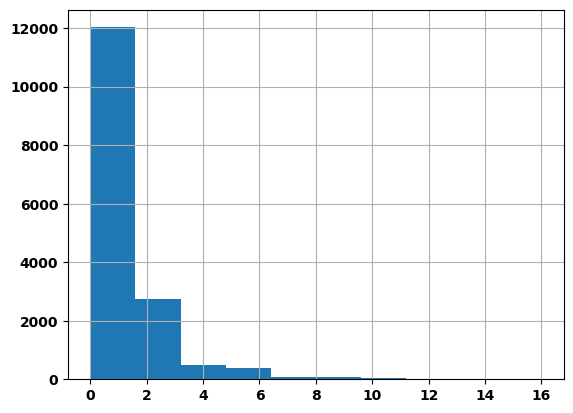

In [555]:
cleaned_final2["Fighter_Current_Win_Streak"].hist()